## Observations and Insights

## Dependencies and starter code

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

scientist_image= "Images/Laboratory.jpg"

# Combine the data into a single dataset
superset= pd.merge(study_results ,mouse_metadata) 
superset.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


## Summary statistics

In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_regimen= superset.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median_regimen= superset.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
variance_regimen= superset.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
std_regimen= superset.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem_regimen= superset.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

summary_df= pd.DataFrame({ "Regimen Mean": mean_regimen.map('{:,.2f}'.format),
                          "Regimen Median": median_regimen.map('{:,.2f}'.format),
                          "Regimen Variance": variance_regimen.map('{:,.2f}'.format),
                          "Regimen STD": std_regimen.map('{:,.2f}'.format),
                          "Sem Regimen": sem_regimen.map('{:,.2f}'.format)
    
})
summary_df

,Regimen Mean,Regimen Median,Regimen Variance,Regimen STD,Sem Regimen
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

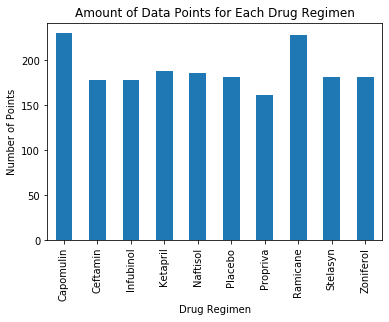

In [46]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen_points= superset.groupby(['Drug Regimen'])
treatment_count= regimen_points['Mouse ID'].count()

treatment_bar= treatment_count.plot(kind='bar', title='Amount of Data Points for Each Drug Regimen', xlim=(1,10))
# plt.xticks(treatment_bar, size=14)
treatment_bar.set(ylabel='Number of Points')

treatment_bar




<function matplotlib.pyplot.show(*args, **kw)>

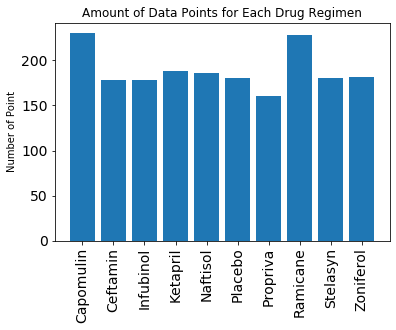

In [47]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(treatment_count.index, treatment_count)
plt.ylabel('Number of Point') #how can I increase the size of this 
plt.yticks(size =14)
plt.xticks(size= 14, rotation=90)
plt.title('Amount of Data Points for Each Drug Regimen')
plt.show

## Pie plots

Text(0, 0.5, 'Sex')

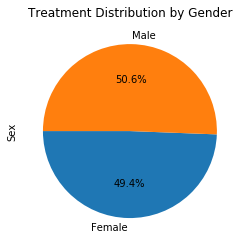

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_count= superset.groupby('Sex')
gender_pie= pie_count['Mouse ID'].count()
gender_pie= gender_pie.plot(kind='pie', title='Treatment Distribution by Gender', autopct="%1.1f%%", startangle=180)
gender_pie.set_ylabel("Sex")

<function matplotlib.pyplot.show(*args, **kw)>

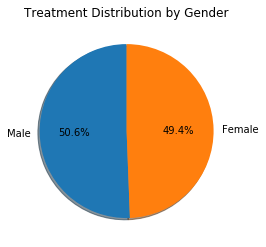

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pie_count=superset['Sex'].value_counts(normalize = True)
pie_count


plt.pie(pie_count, labels= pie_count.index, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title('Treatment Distribution by Gender')
plt.show

## Quartiles, outliers and boxplots

In [50]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

mouse_final_tumor = superset.loc[superset.groupby("Mouse ID").Timepoint.idxmax()]
mouse_final_tumor.head()

drug_list=['Capomulin', 'Infubinol', 'Ramicane', 'Ceftamin']

for drug in drug_list:
    drug_df = mouse_final_tumor[mouse_final_tumor["Drug Regimen"] == drug]
    
    quartiles = drug_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"Values below {lower_bound} could be outliers")
    print(f"Values above {upper_bound} could be outliers")
    
    min_tumor = drug_df["Tumor Volume (mm3)"].min()
    max_tumor = drug_df["Tumor Volume (mm3)"].max()
    
    print(f"The smallest tumor of {drug} is: {min_tumor}")
    print(f"The largest tumor of {drug} is: {max_tumor}")
    
    if min_tumor < lower_bound or max_tumor > upper_bound:
        print(f"***There is an outlier for {drug}.***")
    
    print("------------------------------------------------------")




The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
Values below 20.70456164999999 could be outliers
Values above 51.83201549 could be outliers
The smallest tumor of Capomulin is: 23.34359787
The largest tumor of Capomulin is: 47.68596303
------------------------------------------------------
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
Values below 36.83290494999999 could be outliers
Values above 82.74144559000001 could be outliers
The smallest tumor of Infubinol is: 36.321345799999996
The largest tumor of Infubinol is: 72.2267309
***There is an outlier for Infubinol.***
------------------------------------------------------
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
V

AttributeError: 'Figure' object has no attribute 'set_title'

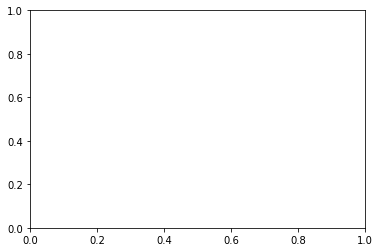

In [55]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
ax1, drug_df = plt.subplots()
ax1.set_title('Outliers')
ax1.set_ylabel('dsdsd')
ax1.boxplot(times)
plt.show(drug_df)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a2319f450>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2395db90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a238b5b50>],
 'medians': [<matplotlib.lines.Line2D at 0x1a240add90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a238b5e90>],
 'means': []}

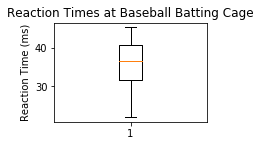

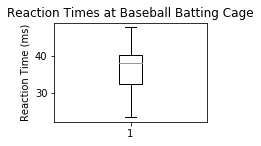

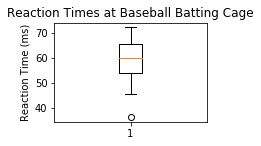

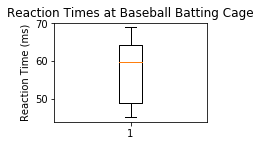

In [84]:

drug_1 = mouse_final_tumor[mouse_final_tumor["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
drug_2 = mouse_final_tumor[mouse_final_tumor["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
drug_3 = mouse_final_tumor[mouse_final_tumor["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
drug_4 = mouse_final_tumor[mouse_final_tumor["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]

#fig = plt.figure()
ax1 = plt.figure().add_subplot(2,2,1)
ax1.set_title('Reaction Times at Baseball Batting Cage')
ax1.set_ylabel('Reaction Time (ms)')
ax1.boxplot(drug_1)

ax2 = plt.figure().add_subplot(2,2,2)
ax2.set_title('Reaction Times at Baseball Batting Cage')
ax2.set_ylabel('Reaction Time (ms)')
ax2.boxplot(drug_2)

ax3 = plt.figure().add_subplot(2,2,3)
ax3.set_title('Reaction Times at Baseball Batting Cage')
ax3.set_ylabel('Reaction Time (ms)')
ax3.boxplot(drug_3)

ax4 = plt.figure().add_subplot(2,2,4)
ax4.set_title('Reaction Times at Baseball Batting Cage')
ax4.set_ylabel('Reaction Time (ms)')
ax4.boxplot(drug_4)



## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
